 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [315]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [316]:
csv_path1 = Path ("Resources/whale_returns.csv")
csv_path2 = Path ("Resources/algo_returns.csv")
csv_path3 = Path ("Resources/sp_tsx_history.csv")


In [317]:
whale_returns_df = pd.read_csv(csv_path1, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = pd.read_csv(csv_path2, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df = pd.read_csv(csv_path3, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [318]:
# Reading whale returns
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [319]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [320]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [321]:
# Reading algorithmic returns
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [322]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [323]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [324]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [325]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [326]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)

sp_tsx_df.dtypes

C:\Users\triba\AppData\Local\Temp/ipykernel_7856/3362792464.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')


Close    float64
dtype: object

In [327]:
# Calculate Daily Returns
sp_tsx_daily = sp_tsx_df.pct_change()
sp_tsx_daily.head(20)

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709
2012-10-10 -0.004982
2012-10-11  0.001763
2012-10-12 -0.002608
2012-10-15  0.002288
2012-10-16  0.014533
2012-10-17  0.004316
2012-10-18  0.000391
2012-10-19 -0.004022
2012-10-22 -0.001002
2012-10-23 -0.014327
2012-10-24 -0.002521
2012-10-25  0.008627
2012-10-26  0.000006
2012-10-29  0.001012

In [328]:
# Drop nulls
sp_tsx_daily.isnull().sum()
sp_tsx_daily = sp_tsx_daily.dropna()
sp_tsx_daily.head()

Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

In [329]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily = sp_tsx_daily.rename({"Close":"SP Daily Returns"}, axis='columns')

sp_tsx_daily.head()


SP Daily Returns
Date                        
2012-10-02          0.001701
2012-10-03         -0.002563
2012-10-04          0.007137
2012-10-05         -0.002305
2012-10-09         -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [330]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily], axis="columns", join="inner")
combined_returns.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  SP Daily Returns  
Date                                    
2015-03-03 -0.000949         -0.008530  
2015-03-04  0.002416         -0.003371  
2015-03-05  0.004323          0.001344  
2015-03-06 -0.011460         -0.009972  
2015-03-09  0.001303         -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

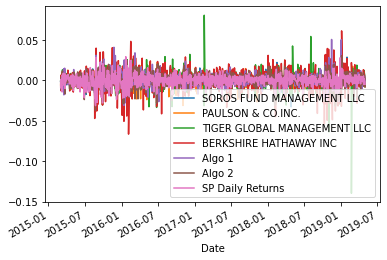

In [331]:
# Plot daily returns of all portfolios
combined_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

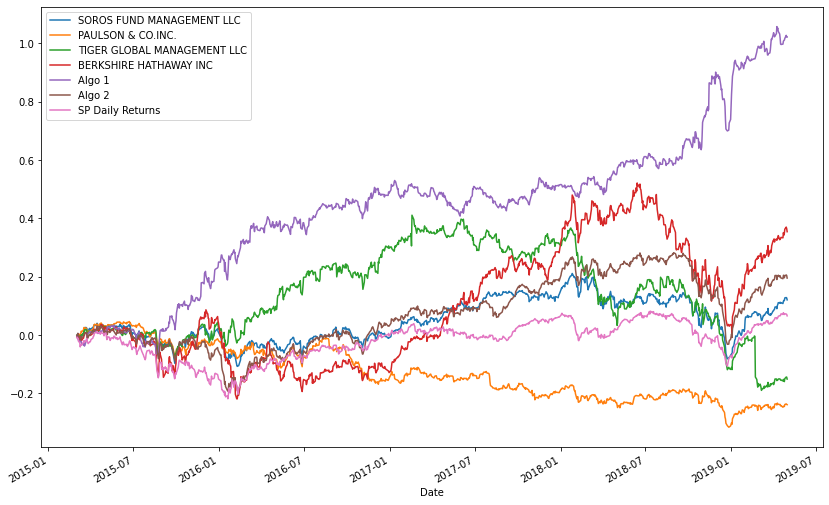

In [332]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cum_returns.plot(figsize=(14, 9))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


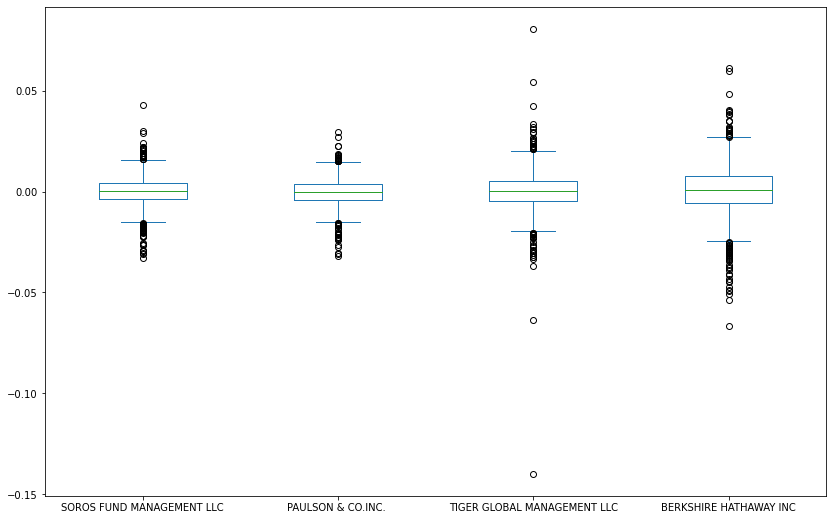

In [333]:
# Box plot to visually show risk

whales_portfolio = whale_returns_df.plot(kind="box", figsize=(14, 9))



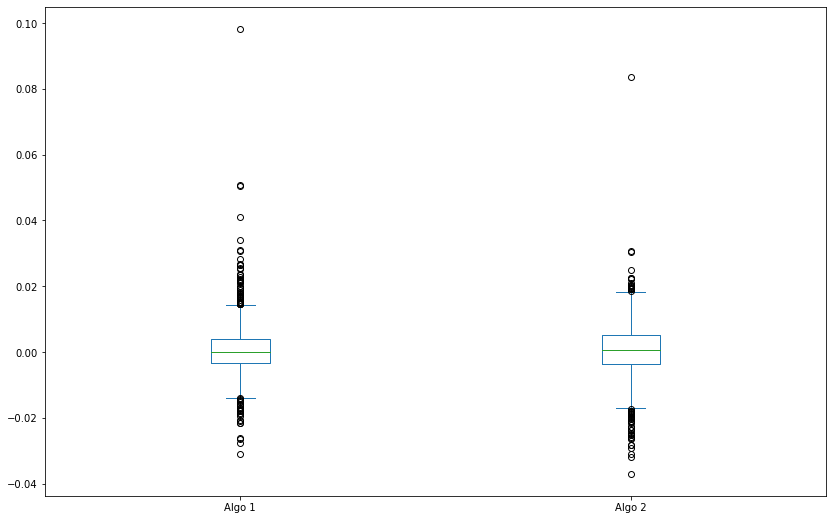

In [334]:
algo_portfolio = algo_returns_df.plot(kind="box",figsize=(14, 9))

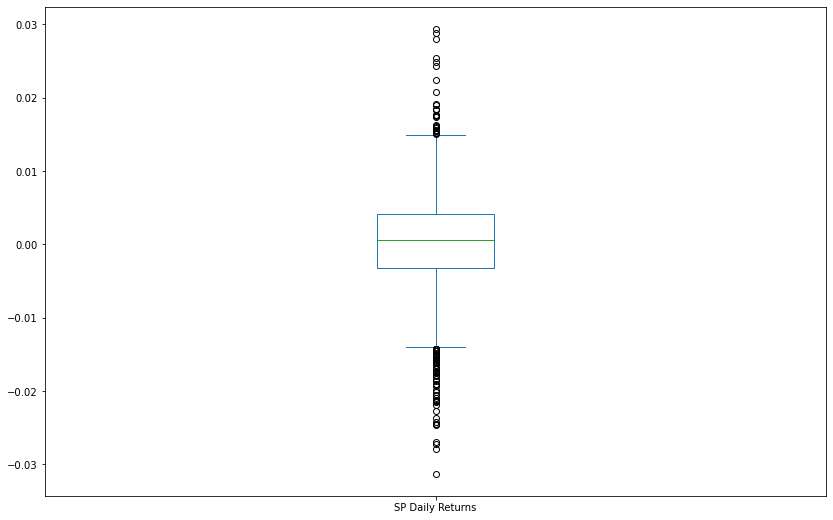

In [335]:
sp_portfolio = sp_tsx_daily.plot(kind="box",figsize=(14, 9))

### Calculate Standard Deviations

In [336]:
# Calculate the daily standard deviations of all portfolios
#whale_returns_mean = whale_returns_df.mean()
whale_returns_std = whale_returns_df.std().mean()
#algo_returns_mean = algo_returns_df.mean()
algo_returns_std = algo_returns_df.std().mean()



### Determine which portfolios are riskier than the S&P TSX 60

In [337]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_returns_std = sp_tsx_daily.std()
print(f"Whale portfolio std : {whale_returns_std}")
print(f"Algo portfolio std  : {algo_returns_std}")
print(sp_returns_std)
# Determine which portfolios are riskier than the S&P TSX 60



Whale portfolio std : 0.009618471706059247
Algo portfolio std  : 0.008227087477314397
SP Daily Returns    0.006637
dtype: float64


In [ ]:
### Whale portfolio and Algo portfolio are riskier than S&P 


### Calculate the Annualized Standard Deviation

In [338]:
# Calculate the annualized standard deviation (252 trading days)
annualized_whale_std = whale_returns_std * np.sqrt(252)
annualized_algo_std = algo_returns_std * np.sqrt(252)

annualized_sp_std = sp_returns_std * np.sqrt(252)

print(annualized_whale_std)
print(annualized_algo_std)
print(annualized_sp_std)


0.15268850476046356
0.13060096487608586
SP Daily Returns    0.105365
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

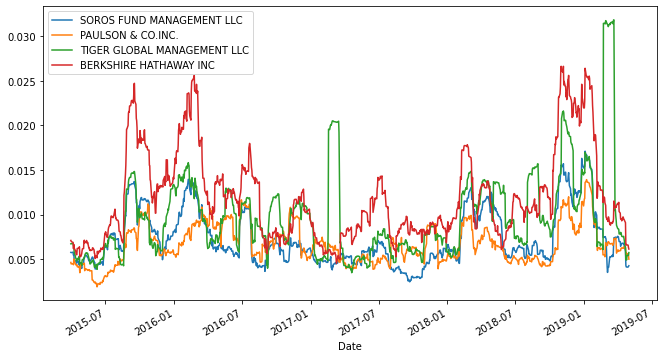

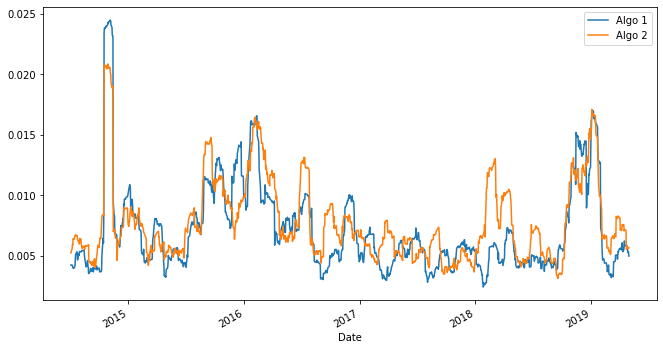

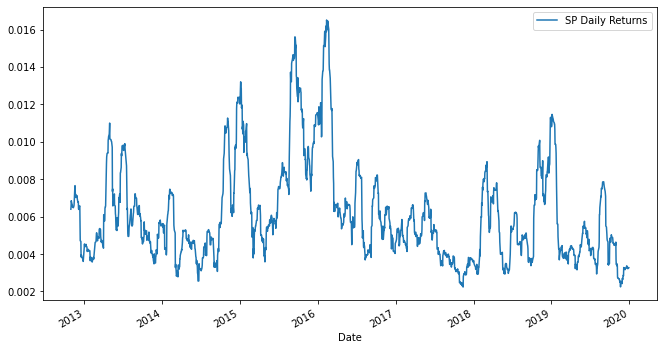

In [339]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window


whale_returns_df.rolling(window =21).std().plot(figsize=(11, 6))
algo_returns_df.rolling(window =21).std().plot(figsize=(11, 6))
sp_tsx_daily.rolling(window =21).std().plot(figsize=(11, 6))
#Plot the rolling standard deviation


### Calculate and plot the correlation

In [340]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix

#import seaborn as sns
correlation.style.background_gradient(cmap="winter")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

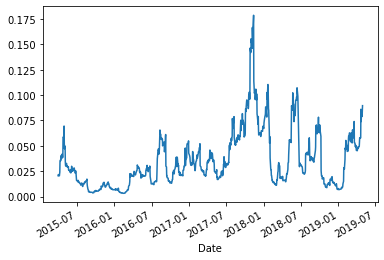

In [341]:
# Calculate covariance of a single portfolio
cov_sp = combined_returns["Algo 1"].rolling(21).mean().cov(combined_returns["SP Daily Returns"])

# Calculate variance of S&P TSX
var_sp_portfolio = combined_returns["SP Daily Returns"].rolling(21).var()



# Computing beta
beta = cov_sp / var_sp_portfolio
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

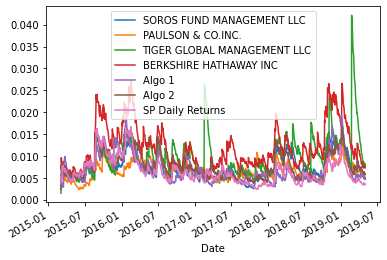

In [342]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(span =21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [343]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_returns.mean() *252) / ( combined_returns.std() * np.sqrt(252))

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP Daily Returns               0.195550
dtype: float64


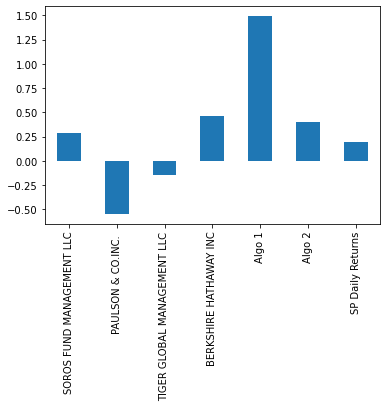

In [344]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")
print(sharpe_ratio)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!
Algorithmic strategies(expecially Algo 1) outperform S&P and whales portfolio with the highest sharpe ratio of 1.49 compared to 0.46 for whales portfolio and 0.19 for S&P

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [346]:
# Reading data from 1st stock
csv_path4 = Path ("Resources/tsla_history.csv")
uber_df = pd.read_csv(csv_path4, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [347]:
# Reading data from 2nd stock
csv_path5 = Path ("Resources/sony_history3.csv")
sony_df = pd.read_csv(csv_path5, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [348]:
# Reading data from 3rd stock
csv_path6 = Path ("Resources/ebay_history3.csv")
ebay_df = pd.read_csv(csv_path6, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [349]:
# Reading data from 4rd stock
csv_path7 = Path ("Resources/ibm_history3.csv")
ibm_df = pd.read_csv(csv_path7, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [350]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([uber_df, sony_df, ebay_df, ibm_df], axis="columns", join="inner")
my_portfolio_df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2016-01-04  46.144001  46.276001  43.799999  44.681999  44.681999  34135500   
2016-01-05  45.271999  45.377998  44.000000  44.686001  44.686001  15934000   
2016-01-06  44.000000  44.009998  43.195999  43.807999  43.807999  18895500   
2016-01-07  42.838001  43.688000  42.734001  43.130001  43.130001  17771500   
2016-01-08  43.571999  44.088001  42.153999  42.200001  42.200001  18140500   

                 Open       High        Low      Close  ...        Low  \
Date                                                    ...              
2016-01-04  24.450001  24.799999  24.309999  24.730000  ...  26.080000   
2016-01-05  24.910000  25.719999  24.910000  25.469999  ...  25.940001   
2016-01-06  25.469999  25.469999  23.270000  23.629999  ...  25.770000   
2016-01-07  23.520000  23.650000  23.170000  23.270000  ...  25.600000   
2016-01-08  23.820000  23.910000  23.000000  23.000000  ...  25.670000   

                Close  Adj Close    Volume        Open        High  \
Date                                                                 
2016-01-04  26.430000  25.385103  19107600  129.636703  129.990433   
2016-01-05  26.120001  25.087357  16691400  130.745697  130.869980   
2016-01-06  26.410000  25.365891  12139900  128.470367  129.617584   
2016-01-07  25.690001  24.674355  13350000  127.820267  129.082214   
2016-01-08  25.750000  24.731981  11233800  127.323135  127.934990   

                   Low       Close  Adj Close   Volume  
Date                                                    
2016-01-04  128.336517  129.971313  99.541290  5469952  
2016-01-05  128.919693  129.875717  99.468071  4105341  
2016-01-06  127.743790  129.225616  98.970200  4509201  
2016-01-07  126.606117  127.017204  97.278847  7348987  
2016-01-08  125.544930  125.841301  96.378227  4981784  

[5 rows x 24 columns]

In [351]:
# Reset Date index



In [352]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_df = my_portfolio_df.drop(["Open", "High", "Low", "Volume","Adj Close"], axis=1)
my_portfolio_df = my_portfolio_df.replace('$', '', regex=True)
my_portfolio_df = my_portfolio_df.replace(',', '', regex=True)
my_portfolio_df = my_portfolio_df.astype(float)

my_portfolio_df.head()
                     

Close      Close      Close       Close
Date                                                   
2016-01-04  44.681999  24.730000  26.430000  129.971313
2016-01-05  44.686001  25.469999  26.120001  129.875717
2016-01-06  43.807999  23.629999  26.410000  129.225616
2016-01-07  43.130001  23.270000  25.690001  127.017204
2016-01-08  42.200001  23.000000  25.750000  125.841301

In [353]:
# Calculate daily returns

col_name = ["Tsla", "Sony", "Ebay", "Ibm"]
my_portfolio_df.columns = col_name
my_portfolio_dailyr = my_portfolio_df.pct_change()
# Drop NAs
my_portfolio_dailyr.head()
my_portfolio_dailyr.isnull().sum()
my_portfolio_dailyr = my_portfolio_dailyr.dropna()

# Display sample data
my_portfolio_dailyr.sample()

Tsla      Sony      Ebay       Ibm
Date                                              
2017-07-13 -0.018542  0.001762  0.013045 -0.000455

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [354]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_dailyr.dot(weights)
# Display sample data
my_portfolio_returns.head()
my_portfolio_dailyr.head(20)

Tsla      Sony      Ebay       Ibm
Date                                              
2016-01-05  0.000090  0.029923 -0.011729 -0.000736
2016-01-06 -0.019648 -0.072242  0.011103 -0.005006
2016-01-07 -0.015477 -0.015235 -0.027262 -0.017090
2016-01-08 -0.021563 -0.011603  0.002336 -0.009258
2016-01-11 -0.014929  0.015652  0.013592  0.012155
2016-01-12  0.010200 -0.021832  0.004215 -0.002477
2016-01-13 -0.046007 -0.015755 -0.030523 -0.013017
2016-01-14  0.029305 -0.008448  0.017710  0.013265
2016-01-15 -0.005772 -0.038565 -0.023202 -0.021669
2016-01-19 -0.001317  0.035914  0.020190 -0.014766
2016-01-20 -0.029406 -0.052679  0.001940 -0.048786
2016-01-21  0.006391  0.005703  0.010457  0.008616
2016-01-22  0.012902  0.027410  0.013032 -0.003336
2016-01-25 -0.030462 -0.028059 -0.010972 -0.003429
2016-01-26 -0.014360  0.004733  0.019510  0.004178
2016-01-27 -0.028363 -0.008950 -0.008630 -0.013296
2016-01-28  0.008667 -0.035646 -0.124527  0.010417
2016-01-29  0.007907  0.176934  0.014267  0.021028
2016-02-01  0.030021 -0.023869  0.020460  0.000321
2016-02-02 -0.071900 -0.039468 -0.027151 -0.015141

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [355]:
# Join your returns DataFrame to the original returns DataFrame

joined_returns = pd.concat([my_portfolio_dailyr,combined_returns], axis = "columns", join = "inner")


In [358]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns = joined_returns.dropna()
joined_returns.tail()

Tsla      Sony      Ebay       Ibm  SOROS FUND MANAGEMENT LLC  \
Date                                                                            
2018-12-20 -0.052828 -0.010049 -0.010954 -0.029288                  -0.016673   
2018-12-21  0.013920 -0.031904 -0.050375 -0.018404                  -0.022720   
2018-12-24 -0.076242 -0.018190 -0.016554 -0.030377                  -0.019152   
2018-12-27 -0.030544  0.019110  0.006463  0.021456                   0.004184   
2018-12-28  0.056116 -0.008036  0.007492 -0.006592                   0.001145   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Date                                                          
2018-12-20           -0.008347                    -0.011045   
2018-12-21           -0.020980                    -0.022570   
2018-12-24           -0.011786                    -0.029165   
2018-12-27           -0.007472                     0.009149   
2018-12-28            0.000863                    -0.004019   

            BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  SP Daily Returns  
Date                                                                      
2018-12-20               -0.025463 -0.026095 -0.023793         -0.008573  
2018-12-21               -0.028892 -0.017888 -0.021636         -0.014590  
2018-12-24               -0.020181 -0.003938 -0.014745         -0.011141  
2018-12-27                0.004813  0.001571  0.000494          0.027940  
2018-12-28               -0.006178  0.014664  0.011664          0.004009

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [357]:
# Calculate the annualized `std`
my_portfolio_dailyr.std()


Tsla    0.028486
Sony    0.019056
Ebay    0.017264
Ibm     0.012904
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

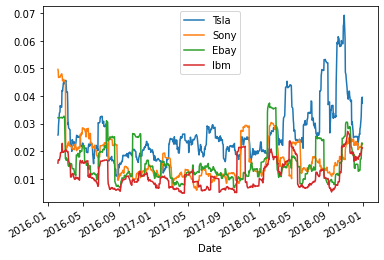

In [359]:
# Calculate rolling standard deviation
my_port_roll_std = my_portfolio_dailyr.rolling(21).std()
# Plot rolling standard deviation
my_port_roll_std.plot()

### Calculate and plot the correlation

In [362]:
# Calculate and plot the correlation
my_port_corr = joined_returns.corr()
my_port_corr.style.background_gradient(cmap="winter")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

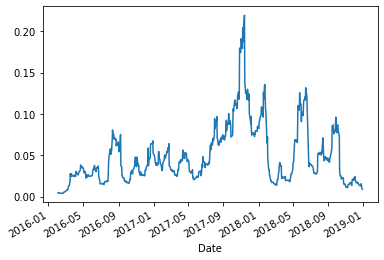

In [364]:
# Calculate and plot Beta
cov_my_port = joined_returns["Ibm"].rolling(21).mean().cov(joined_returns["SP Daily Returns"])

# Calculate variance of S&P TSX
var_my_port = joined_returns["SP Daily Returns"].rolling(21).var()



# Computing beta
beta2 = cov_my_port / var_my_port
# Plot beta trend
beta2.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [365]:
# Calculate Annualized Sharpe Ratios
my_port_sharpe = (joined_returns.mean() *252) / ( joined_returns.std() * np.sqrt(252))

<AxesSubplot:>

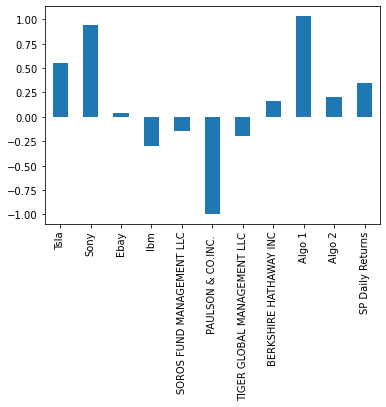

In [366]:
# Visualize the sharpe ratios as a bar plot
my_port_sharpe.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

Overall my portfolio outperform whale portfolio, but has lower sharp ratio compared to algo portfolio, S&P have similar ratio.